In [10]:
import numpy as np
from numpy import maximum, finfo, all, flip, arange, count_nonzero, min, max, floor, log10, prod, diag, eye
from numpy.linalg import cond, eig
from scipy.linalg import cholesky, det, inv, LinAlgError
import matplotlib.pyplot as plt
from matplotlib.pyplot import semilogy, title, grid
from mat2npy import K

## Question 1
In this question, you are asked to perform a number of tests and then give your opinion,
with reasons, as to whether the matrix is a valid correlation matrix. 

In [ ]:
# (1)(a): What are the dimensions of K? Is K square?

print(K.shape)
print(K.shape[0] == K.shape[1])

# (Explanation).
#   - `np.shape` returns 'depth' of arrays, e.g. [[], [], ..., []] = 2.

(500, 500)
True


In [ ]:
# (1)(b): Is K symmetric?

is_symmetric = np.allclose(K, K.T, atol=1e-12)
print("Is symmetric:", is_symmetric)

# (Explanation).
#   - A correlation matrix must be symmetric.
#   - Syntax: `np.allclose(A, B)` compares if two matrices are equal with a given tolerance.

Is symmetric: True


In [ ]:
# (1)(c): Is K positive definite?

try:
    R = cholesky(K)
    is_posdef = True
except LinAlgError:
    is_posdef = False
print("Is positive definite:", is_posdef)

# (Explanation).
#   - If we can find a Cholesky decomposition, then it is positive definition 
#       - since a Cholesky decomposition exists iff it is square and p.d..

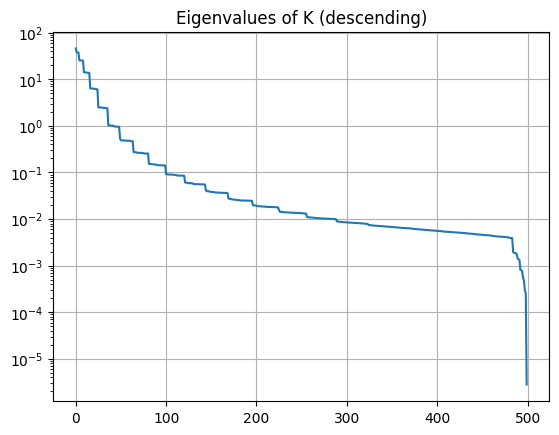

Largest eigenvalue: 45.718466277213025
Smallest eigenvalue: 2.8184232446666624e-06


In [ ]:
# (1)(d): Plot eigenvalues in descending order; find min and max

eigenvalues = np.linalg.eigvalsh(K)
sorted_eigs = np.flip(np.sort(eigenvalues))

plt.semilogy(sorted_eigs)
plt.title("Eigenvalues of K (descending)")
plt.grid()
plt.show()

print("Largest eigenvalue:", sorted_eigs[0])
print("Smallest eigenvalue:", sorted_eigs[-1])

In [ ]:
# (1)(e): Compute determinant with three methods

# i. Direct
det_direct = det(K)

# ii. Using Cholesky: det(K) = det(R^T R) = det(R)^2
try:
    R = cholesky(K)
    det_cholesky = np.prod(np.diag(R))**2
except:
    det_cholesky = None

# iii. Using eigenvalues
det_eigs = np.prod(eigenvalues)

print("Det (direct):", det_direct)
print("Det (Cholesky):", det_cholesky)
print("Det (eigenvalues):", det_eigs)

Det (direct): 0.0
Det (Cholesky): 0.0
Det (eigenvalues): 0.0


In [14]:
# (1)(f): Are all diagonals equal to 1?

diag_is_1 = np.allclose(np.diag(K), 1.0, atol=1e-12)
print("All diagonal entries are 1:", diag_is_1)

# (Explanation).
#   - correlation matrices have 1 on the diagonal

All diagonal entries are 1: True


In [ ]:
# (1)(g): Min and Max are off-diagonal correlations

off_diag = K[~np.eye(K.shape[0],dtype=bool)]
print("Min correlation (off-diagonal):", np.min(off_diag))
print("Max correlation (off-diagonal):", np.max(off_diag))

# (Explanation).
#   - Syntax: `np.eye(K.shape[0], dtype=bool)` makes an m-sized matrix (if K is m by n) with diagonals true, and all else false; "eye" = I
#       - then the `~` negates this
#       - and `K[...]` only gets the indices where the mask is true, so we get all non-diagonal entries.
#   - Min should be >= -1, Max should be <= 1

Min correlation (off-diagonal): 0.0
Max correlation (off-diagonal): 0.9999838411368828


In [ ]:
# (1)(h): What percentage of the elements are non-zero?

nnz = np.count_nonzero(K)
total = K.size
sparsity_percent = 100 * nnz / total
print("Non-zero percentage:", sparsity_percent)

# (Explanation).
#   - Indicates how sparse the matrix is.

Non-zero percentage: 64.056


In [ ]:
# (1)(g): Singularity

try:
    K_inv = inv(K)
    print("K is nonsingular (inverse exists)")
except LinAlgError:
    print("K is singular (inverse does not exist)")

K is nonsingular (inverse exists)


In [ ]:
# (1)(j): Compute 𝛼=𝑏^𝑇 𝐾^{−1} 𝑏

b = np.random.rand(K.shape[0])
alpha = b @ inv(K) @ b  # inefficient
alpha_efficient = b @ np.linalg.solve(K, b)  # efficient
print("Alpha (with inverse):", alpha)
print("Alpha (efficient solve):", alpha_efficient)

# (Explanation).
#   - Inverting a matrix is costly; O(n^3)
#       - it can also amplify rounding errors.
#   - Instead solve Kx = b to get x = K^{-1}b so that b * x = b * K^{-1} b which is what we want
#   - The `@` means matrix multiplication; we don't need b.T here because it will still be a 1D vector... Python things 

Alpha (with inverse): 5135.62153652947
Alpha (efficient solve): 5135.6215365294975


In [ ]:
# (1)(k): Condition Number and Significant Figures

kappa = cond(K, 2)
print("Condition number (2-norm):", kappa)
sig_figs = int(np.floor(-np.log10(kappa))) + 16
print("Approx significant figures in solution: ", sig_figs)

# (Explanation).
#   - Calculation as normal.
#   - Sig. figs. = 16 (precision of float64) - log_10(n) (how many digits will be corrupted)
#       - think shifting digits, but instead being corrupted...
#       - if multiply by 10, then where ever the last uncertain digit is, it will shift over by 1
#       - and a new uncertain digit will be produced. 

Condition number (2-norm): 16221291.945628477
Approx significant figures in solution:  8


In [ ]:
# (1)(l): Any other tests?

print("Is K real-valued:", np.isrealobj(K))
print("Does K have negative eigenvalues:", np.any(eigenvalues < 0))

# (Explanation).
#   - Real-valuedness (correlation must be real) and negative eigenvalues (must be positive definite)

Is K real-valued: True
Does K have negative eigenvalues: False


In [19]:
# (1)(k): Conclusion

# Yes, it may be.